In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=41, climo_ye=50, ts_ys=1, ts_ye=50)
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.0051-01-01_00000.nc'

Running on machine pn1803144.lanl.gov


In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)

## Cross sections

In [4]:
# cross section 1
s1_s_lat = 63
s1_s_lon = 296
s1_e_lat = 50
s1_e_lon = 320
# cross section 2 (WOCE AR7W)
s2_s_lat = 53.5
s2_s_lon = 304.5
s2_e_lat = 61
s2_e_lon = 312

In [5]:
# set endpoints
lonP0, latP0 = s2_s_lon, s2_s_lat
lonP1, latP1 = s2_e_lon, s2_e_lat
lonP2, latP2 = s1_e_lon, s1_e_lat
print('Endpoints:')
print('    P0: {:4.1f} {:4.1f}'.format(lonP0, latP0))
print('    P1: {:4.1f} {:4.1f}'.format(lonP1, latP1))
print('    P2: {:4.1f} {:4.1f}'.format(lonP2, latP2))
# get the shortest path
path0 = mpasmesh.get_shortest_path(lonP0, latP0, lonP1, latP1, npoint_ref=2, debug_info=False) 
path1 = mpasmesh.get_shortest_path(lonP0, latP0, lonP2, latP2, npoint_ref=2, debug_info=False) 
path2 = mpasmesh.get_shortest_path(lonP1, latP1, lonP2, latP2, npoint_ref=2, debug_info=False) 

Endpoints:
    P0: 304.5 53.5
    P1: 312.0 61.0
    P2: 320.0 50.0
Vertex closest to P0: 304.58613 53.44701
Vertex closest to P1: 312.08908 60.99671
 - Vertex closest to RefP1: 306.75188 56.12108
 - Vertex closest to RefP2: 309.43468 58.46836
Vertex closest to P0: 304.58613 53.44701
Vertex closest to P1: 319.99442 49.93214
 - Vertex closest to RefP1: 309.91235 52.60165
 - Vertex closest to RefP2: 314.87265 51.31731
Vertex closest to P0: 312.08908 60.99671
Vertex closest to P1: 319.99442 49.93214
 - Vertex closest to RefP1: 315.43590 57.37919
 - Vertex closest to RefP2: 317.69114 53.70907


## Bathymetry

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Plotting map of Bottom Depth (m) at region 'LabSea'


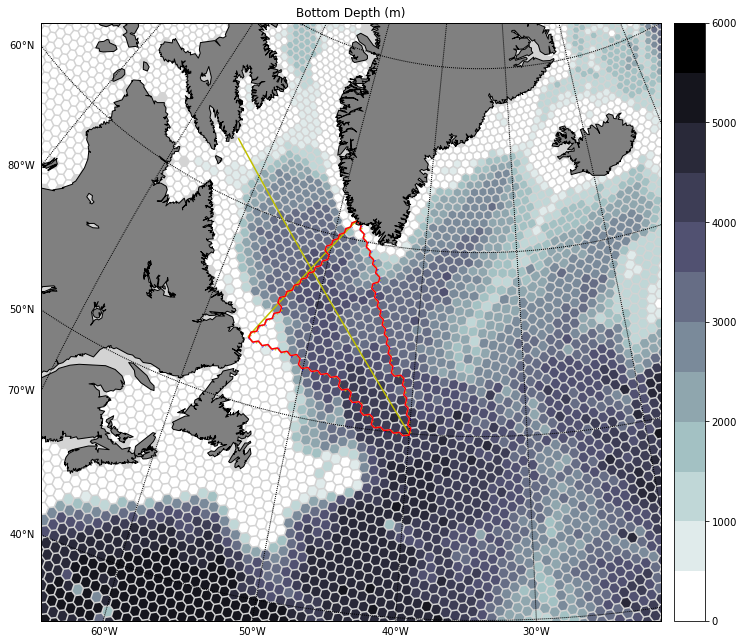

In [6]:
fig = plt.figure(figsize=[12,11])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot cross sections
m.drawgreatcircle(s1_s_lon, s1_s_lat, s1_e_lon, s1_e_lat, color='y')
m.drawgreatcircle(s2_s_lon, s2_s_lat, s2_e_lon, s2_e_lat, color='y')
# plot paths
path0.plot_edge(m, c='r')
path0.plot_edge_center(m, c='y')
path0.plot_vertex(m, c='b')
path1.plot_edge(m, c='r')
path1.plot_edge_center(m, c='y')
path1.plot_vertex(m, c='b')
path2.plot_edge(m, c='r')
path2.plot_edge_center(m, c='y')
path2.plot_vertex(m, c='b')

mpasmesh.plot_edges(m, colors='lightgray')

plt.show()
# figname = fig_root+'/LabSea_bathymetry.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

Reading mesh data from /Users/qingli/data/mpas/test/mpaso.rst.0051-01-01_00000.nc
Plotting map of Area of triangle (m^2) at region 'LabSea'


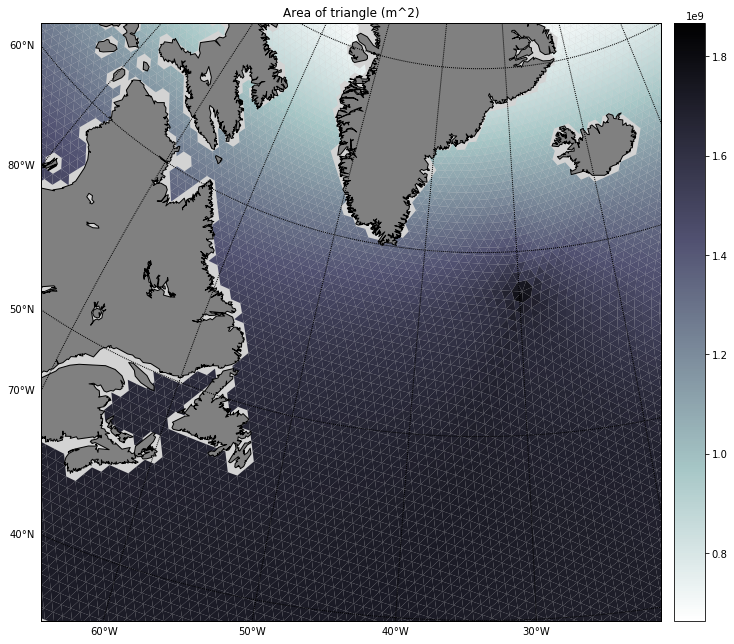

In [7]:
fig = plt.figure(figsize=[12,11])
# levels = np.linspace(0, 6000, 13)
levels = None
out = mpasmesh.get_map('areaTriangle', name='Area of triangle', position='vertex'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)